<a href="https://colab.research.google.com/github/iat7/ml/blob/master/flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pathlib import Path
from fastai import *
from fastai.vision import *
from fastai.core import *

input_dir = Path('/content/input/')

https://docs.fast.ai/basic_train.html#Model-fitting-methods
https://github.com/dhamvi01/FastAI-Image-Classification/blob/master/fastai.ipynb
https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html
https://towardsdatascience.com/using-fastai-for-image-classification-54d2b39511ce
https://github.com/catalyst-team/catalyst/blob/master/examples/notebooks/classification-tutorial.ipynb

In [0]:
!rm -rf /content/input && mkdir /content/input/ && tar -xf '/content/drive/My Drive/Colab Notebooks/flower_data.tar' -C /content/input/

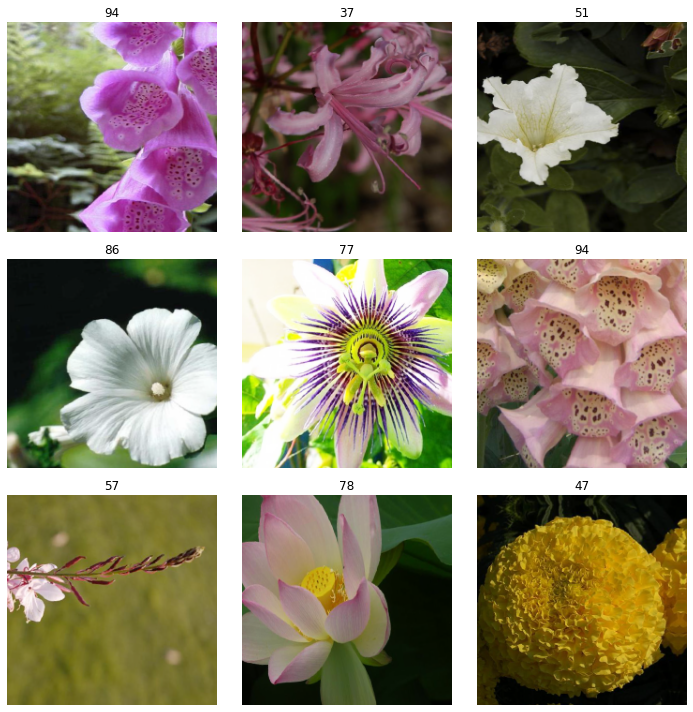

In [3]:
tfms = get_transforms()
data = ImageDataBunch.from_folder(input_dir, test='test', ds_tfms=tfms, size=224)
data.show_batch(rows=3, figsize=(10,10))

In [5]:
learn = cnn_learner(data, models.resnet18, pretrained=True, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [7]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [8]:
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,accuracy,time
0,4.547732,2.159154,0.507335,03:07
1,1.931702,0.596034,0.843521,03:05
2,0.892277,0.341423,0.915648,03:06
3,0.555592,0.286655,0.922983,03:06
4,0.417042,0.251016,0.931540,03:09
5,0.336160,0.244274,0.931540,03:07
6,0.285749,0.209834,0.937653,03:07
7,0.218183,0.203803,0.946210,03:06
8,0.182860,0.216940,0.946210,03:06
9,0.153806,0.196774,0.953545,03:06


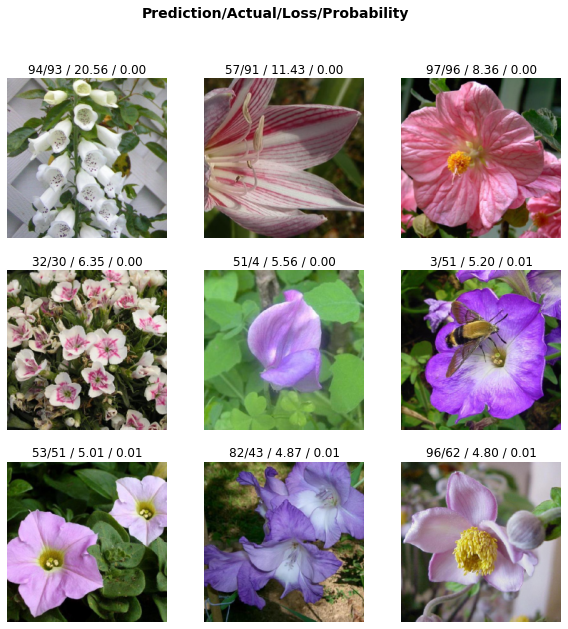

In [9]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_top_losses(9, figsize=(10,10))

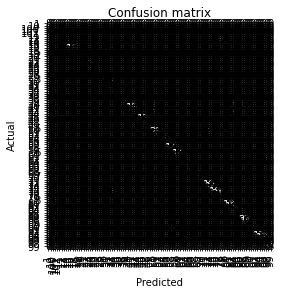

In [10]:
interp.plot_confusion_matrix()

In [0]:
def pretrain_model (data, model):
  learn = cnn_learner(data, model, pretrained=True, metrics=accuracy)
  learn.lr_find()
  learn.fit_one_cycle(15)
  preds,y,losses = learn.get_preds(with_loss=True)
  interp = ClassificationInterpretation(learn, preds, y, losses)
  interp.plot_top_losses(9, figsize=(10,10))

In [11]:
pretrain_model(data, models.googlenet)
pretrain_model(data, models.vgg16)


NameError: ignored